In [1]:
import pandas as pd
df_train=pd.read_csv("train.csv")

In [2]:
df_train.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


In [3]:
print("Dataset Shape:", df_train.shape)
print("\nColumns in the dataset:", df_train.columns.tolist())

Dataset Shape: (93686, 3)

Columns in the dataset: ['category', 'sub_category', 'crimeaditionalinfo']


### **Empty or whitespace values, missing values, duplicates, charecters length < 150**

In [4]:
df_train_cleaned = df_train.copy()
df_train_cleaned.dropna(subset=['crimeaditionalinfo'] ,inplace=True)

In [5]:
# 1. Empty or whitespace values
def strip_warn(row):
    try:
        x = row.strip()
        return x
    except:
        print(row)
        return ""


print(df_train_cleaned[df_train_cleaned['crimeaditionalinfo'].str.strip().str.len() == 0].shape)
df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(strip_warn)
df_train_cleaned = df_train_cleaned[df_train_cleaned['crimeaditionalinfo'].str.strip().str.len() > 0]


(1202, 3)


In [6]:
# 2. Missing values
print(df_train_cleaned.isnull().sum())

category                 0
sub_category          6539
crimeaditionalinfo       0
dtype: int64


In [7]:
# df_train_cleaned=df_train_cleaned.dropna(subset=["crimeaditionalinfo"])

In [8]:
# 3. Duplicates
print(df_train_cleaned.duplicated().sum())

8089


In [9]:
df_train_cleaned=df_train_cleaned.drop_duplicates()

In [10]:
print(df_train_cleaned['crimeaditionalinfo'].duplicated().sum())

466


In [11]:
df_train_cleaned = df_train_cleaned.drop_duplicates(subset=['crimeaditionalinfo'])

In [12]:
# 4. Character length check
count_less_than_150 = df_train_cleaned[df_train_cleaned['crimeaditionalinfo'].str.len() <= 150].shape[0]
print("Number of rows with less than 150 characters in the crimeaditionalinfo column:", count_less_than_150)

Number of rows with less than 150 characters in the crimeaditionalinfo column: 6368


In [13]:
# Keep only rows where text length is > 150 characters
df_train_cleaned = df_train_cleaned[df_train_cleaned['crimeaditionalinfo'].str.len() > 150]

# Reset index
df_train_cleaned.reset_index(drop=True, inplace=True)


In [14]:
df_train_cleaned.shape

(77540, 3)

In [15]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [16]:
df_train_cleaned.sample(10)

,category,sub_category,crimeaditionalinfo
21713,Online and Social Media Related Crime,FakeImpersonating Profile,sir this type of fake profile in facebook first send frend request then share whatspp number then start nude chat and ask to come for video chat after that they blackmailing i record your video send me money otherwise i forward all video to your freinds in your profile one or two known person also blackmailed by this type of fake profilethats why today when i recieved frend ship request then i undertand all d gameso plz recognised dis type of person on social media and give him punishmentalways availlable in your service
12968,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,He got my number from social media and he did whatsapp me as say a girl then I tried to stop him but unfortunately he got me in video call and he created a video call of girl adding me on it and Telling me pay for it or he will viral on social media I tried to stop him but he says pay me
47266,Any Other Cyber Crime,Other,I received call and messages from this unknown no When i pickup the call for the answer then call was disconnected automatically I have fear form the this unknown person Please take action against this person
25347,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,Transaction City shows as Singapore and used my Debit Card when I am at my home The issue is reported to SBI Customer Care within half an hour of the transaction and the debit card in question has been blocked
2877,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,Identity theft Fake Customer Care Service Fraud Google\r\nvictim as lost the atm card so victim as searched in google for to block the card so for customer care number so they said to download the ANYDESK APP the amount as loss
40485,Online Financial Fraud,UPI Related Frauds,PHELE MUJHE CALL AAYA AUR FIR USNE MERE SE KAHA KI AAPKE WHATSAPP PE EK Rs Ka QR CODE GAYA HAI USKO SCAN KIJIYE TO AAPKE ACCOUNT MAI PAISE CHLE JAYNGY TO ST TIME MAI JAB MAINE US QR CODE KO SCAN KIYA TO WO Rs MERE ACCOUNT MAI CREDITED HO GAYE FIR USNE EK Rs KA QR SEND KIYA TO WO BHI MAINE SCAN KIYA BUT WO AAYA NAHI FIR USNE Rs KE QR SEND KIYE AUR BOLA KI USEY BAAR SCAN KARNE KE LIYE AUR BOLA KI UPI PIN MAT DAALNA JB MAI BOLUNGA TB DAALNA FIR USNE SEC KE BAAD BOLA KI HN AB PIN DAALO AISE KRKE HI MERE ACCOUNT SE Rs WITHDRAW HO GAYE
40300,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,Fraud Person Mobile Number active right now and person name is Ajay Kumar Sharma I am so many time calling his number every time use abuse language I requested to please track him and Settle the Case
40865,Any Other Cyber Crime,Other,Sir kl ek ladki ka msg aaya usne video caal kiya or nude ho gyi meri video bna libab blackmail kr ri h air m bahot preshan ho gya hubmenw usko ek rupya bhibnhi diya sari chat ke mene ss le liye h or fb ac deactivated kr diya h sir please meri help kro
7737,Online Financial Fraud,UPI Related Frauds,Identity theft Fake Customer Care Service Fraud Any Others\r\nvictim as a mutton shop the fraud as did a call and said that we are from army so we required the mutton so prepare it so the fraud as sended the qr code and from the victim account the amount as deducted
16622,Online Financial Fraud,UPI Related Frauds,Greetings sir \r\nTelegram per ek group the vha per kisi ek person ne bola m ap ke lie Apple mac order ker du ga amazone \r\nper vo lac ka the but us ne bola m me order kker du ga mne us ne muje order ker ne ke baad order details bi share ki us se phle mne rs transfer kie phir us ne mere order place kia screen shot send kie phir mne remaining transfer kie us ke baad vo bola remaining or transfer kro baki details ke lie other wise m order cancle kr du ga phir sir mne or amount transfer nehi kia or mne es cheej ki complain yha NCCRP me ker di sir ye pm per aj incident hua h please as per my knowledge hours ke under money back ho jati h please sir do needful as soon as possible al

In [17]:
print("FRAUD THROUGH EWALLET\r\nEWALLET MOBIKWIK\r\nWALLET ID \t\r\nTOTAL AMOUNT \t\r\nPLEASE HOLD REVERSE TOTAL AMOUNT IN THE COMPLAINT ACCOUNT AND TAKE NECESSARY ACTION")

FRAUD THROUGH EWALLET
EWALLET MOBIKWIK
WALLET ID 	
TOTAL AMOUNT 	
PLEASE HOLD REVERSE TOTAL AMOUNT IN THE COMPLAINT ACCOUNT AND TAKE NECESSARY ACTION


In [18]:
print("\r\nFRAUD THROUGH phoene pe \r\n\r\nBANK STATE BANK OF INDIA \r\n \r\n\r\nACCOUNT NUMBER AC \r\n\r\n\r\n\r\n\r\n\r\nTotal AMOUNT \r\n\r\n\r\n\r\n\r\nPLEASE HOLD REVERSE TOTAL AMOUNT IN THE COMPLAINT ACCOUNT AND TAKE NECESSARY ACTION\r\n")


FRAUD THROUGH phoene pe 

BANK STATE BANK OF INDIA 
 

ACCOUNT NUMBER AC 





Total AMOUNT 




PLEASE HOLD REVERSE TOTAL AMOUNT IN THE COMPLAINT ACCOUNT AND TAKE NECESSARY ACTION



### **Checking for unique categories & subcategories**

In [19]:
target_cat = [
    "Online Financial Fraud",
    "Rape/Gang Rape (RGR) - Sexually Abusive Content",
    "Sexually Explicit Act",
    "Sexually Obscene Material",
    "Child Pornography (CP) - Child Sexual Abuse Material (CSEAM)",
    "Online and Social Media Related Crime",
    "Hacking/Damage to computer, computer systems etc.",
    "Online Cyber Trafficking",
    "Online Gambling/Betting",
    "Ransomware",
    "Cryptocurrency Crime",
    "Cyber Terrorism",
    "Any Other Cyber Crime"
]

target_subcat = [
    "Aadhar Enabled Payment System (AEPS)",
    "Business Email Compromise/Email Takeover",
    "Debit/Credit Card Fraud/Sim Swap Fraud",
    "Demat/Depository Fraud",
    "E-Wallet Related Fraud",
    "Fraud Call/Vishing",
    "Internet Banking Related Fraud",
    "UPI Related Frauds",
    "Cheating by Impersonation",
    "Cyber Bullying / Stalking / Sexting",
    "E-Mail Phishing",
    "Fake/Impersonating Profile",
    "Impersonating Email",
    "Intimidating Email",
    "Online Job Fraud",
    "Online Matrimonial Fraud",
    "Profile Hacking/Identity Theft",
    "Provocative Speech for Unlawful Acts",
    "Damage to computer, computer systems etc.",
    "Email Hacking",
    "Tampering with computer source documents",
    "Unauthorised Access/Data Breach",
    "Website Defacement/Hacking",
    "Online Trafficking",
    "Online Gambling/Betting",
    "Ransomware",
    "Cryptocurrency Fraud",
    "Cyber Terrorism",
    "Other"
]

In [20]:
print(df_train_cleaned["sub_category"].nunique())
print(df_train_cleaned["category"].nunique())

35
15


In [21]:
# For categories
print("Unique categories in training set:")
train_cat=df_train_cleaned["category"].unique()
print(train_cat)
print(len(train_cat))

# For subcategories
print("\nUnique subcategories in training set:")
train_subcat=df_train_cleaned["sub_category"].unique()
print(train_subcat)
print(len(train_subcat))

Unique categories in training set:
['Online and Social Media Related Crime' 'Online Financial Fraud'
 'Online Gambling  Betting' 'RapeGang Rape RGRSexually Abusive Content'
 'Any Other Cyber Crime' 'Cyber Attack/ Dependent Crimes'
 'Cryptocurrency Crime' 'Sexually Explicit Act'
 'Sexually Obscene material'
 'Hacking  Damage to computercomputer system etc' 'Cyber Terrorism'
 'Child Pornography CPChild Sexual Abuse Material CSAM'
 'Online Cyber Trafficking' 'Ransomware' 'Report Unlawful Content']
15

Unique subcategories in training set:
['Cyber Bullying  Stalking  Sexting' 'Fraud CallVishing'
 'Online Gambling  Betting' 'Online Job Fraud' 'UPI Related Frauds' nan
 'Other' 'Profile Hacking Identity Theft'
 'DebitCredit Card FraudSim Swap Fraud' 'Internet Banking Related Fraud'
 'Data Breach/Theft'
 'Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks'
 'FakeImpersonating Profile' 'EWallet Related Fraud'
 'Cryptocurrency Fraud' 'Malware Attack'
 'Business Email Compromise

In [22]:
#Elements in list1 but not in list2 #CATEGORIES

import numpy as np
# Train Data
diff1 = list(set(target_cat) - set(train_cat))
print(diff1)

diff2 = list(set(train_cat) - set(target_cat))
print(diff2)



['Sexually Obscene Material', 'Rape/Gang Rape (RGR) - Sexually Abusive Content', 'Child Pornography (CP) - Child Sexual Abuse Material (CSEAM)', 'Hacking/Damage to computer, computer systems etc.', 'Online Gambling/Betting']
['Report Unlawful Content', 'Sexually Obscene material', 'Online Gambling  Betting', 'Hacking  Damage to computercomputer system etc', 'Cyber Attack/ Dependent Crimes', 'RapeGang Rape RGRSexually Abusive Content', 'Child Pornography CPChild Sexual Abuse Material CSAM']


In [23]:
#Elements in list1 but not in list2 #SUBCATEGORIES

# Train Data
diff1 = list(set(target_subcat) - set(train_subcat))
print(diff1)

diff2 = list(set(train_subcat) - set(target_subcat))
print(diff2)

['E-Mail Phishing', 'Aadhar Enabled Payment System (AEPS)', 'Provocative Speech for Unlawful Acts', 'Demat/Depository Fraud', 'E-Wallet Related Fraud', 'Fake/Impersonating Profile', 'Damage to computer, computer systems etc.', 'Business Email Compromise/Email Takeover', 'Website Defacement/Hacking', 'Fraud Call/Vishing', 'Debit/Credit Card Fraud/Sim Swap Fraud', 'Unauthorised Access/Data Breach', 'Cyber Bullying / Stalking / Sexting', 'Profile Hacking/Identity Theft', 'Online Gambling/Betting']
['FakeImpersonating Profile', 'Provocative Speech for unlawful acts', 'EWallet Related Fraud', 'Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks', 'Business Email CompromiseEmail Takeover', 'Data Breach/Theft', 'SQL Injection', 'Damage to computer computer systems etc', 'Cyber Bullying  Stalking  Sexting', 'Ransomware Attack', 'DematDepository Fraud', 'Against Interest of sovereignty or integrity of India', 'EMail Phishing', nan, 'Unauthorised AccessData Breach', 'Profile Hac

In [24]:
# Import required libraries
import re
import unicodedata
import contractions


# Fix encoding and handle accented characters
df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(lambda x: unicodedata.normalize('NFKD', x))
df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(lambda x: x.encode('ascii', 'ignore').decode('utf-8'))

# Expand contractions
# df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(lambda x: contractions.fix(x))

# Remove noise but keep periods
df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(lambda x: x.lower())
df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(lambda x: re.sub(r'\S+@\S+', '', x))
df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x))
# Modified to keep periods while removing other punctuation
df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(lambda x: re.sub(r'[^\w\s\.]', '', x))
df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(lambda x: re.sub(r'\s+', ' ', x))
df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(lambda x: x.strip())

In [25]:
from nostril import nonsense
# flagged_words = ''

def clean_gibberish(data : str):
    # global flagged_words

    if len(data) < 6:
        return data
    
    words_list = data.split(sep=" ")

    cleaned_word_list = []


    for word in words_list:
            if len(word) < 15:
                cleaned_word_list.append(word)

            else:
                try:
                    if not nonsense(word) :
                        cleaned_word_list.append(word)
                    # else:
                    #     print(word)
                    #     # flagged_words += word + "\n"
                except:
                    cleaned_word_list.append(word)
                    # print(word)


    return " ".join(cleaned_word_list)




df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(clean_gibberish)

# with open("flaggged.txt", 'w') as file:
#      file.write(flagged_words)


In [26]:
df_train_cleaned.sample(3)

,category,sub_category,crimeaditionalinfo
25105,Any Other Cyber Crime,Other,belloan loan where i tried for online loan though at end i did not asked it for it debited thousand something and they now asking me for repayment in just days also threating me to use contacts and other information to harm my reputation number which calling and didturbing me again again payment id muhammedmusthafampibizicici starmexxupi
70436,Online Financial Fraud,EWallet Related Fraud,namedharamraj vaishnav mobilepaytm no email idsharamrajvaishnavgmailcom address a durga vistar colony behind nbc gate khatipura road distjaipur pssadar jaipur pin code fraud by paytm wallet rupey refrence no date time pm rupey refrence no date time pm total fraud rupey frauder ke no suchna karta ne bataya ki enke pass ek no se call aaya or paise dalne ki bolkar paytm wallet se paise nikal liye gye
70612,Online Financial Fraud,UPI Related Frauds,upi fraud by making call and screen mirroring link by massage and amount debited time without receiving otp and even not received any massage after deducting money from my account pls resolve my issue


**EDA**

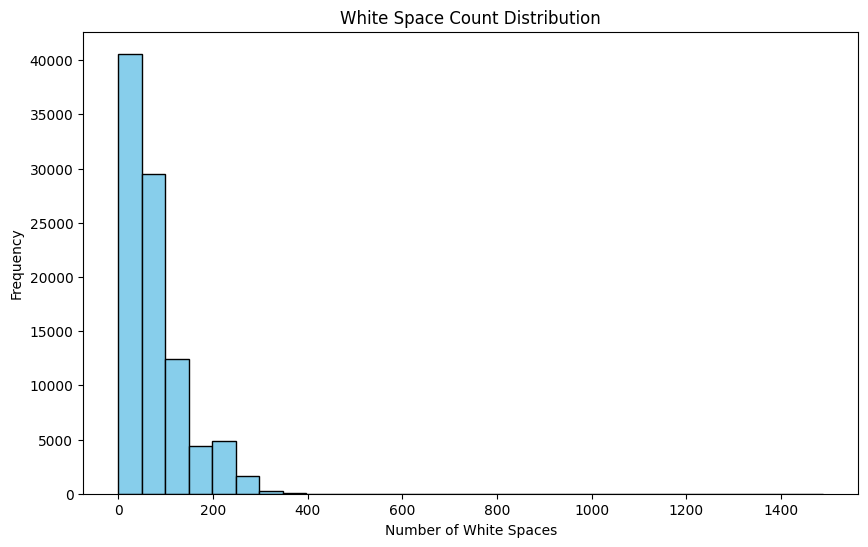

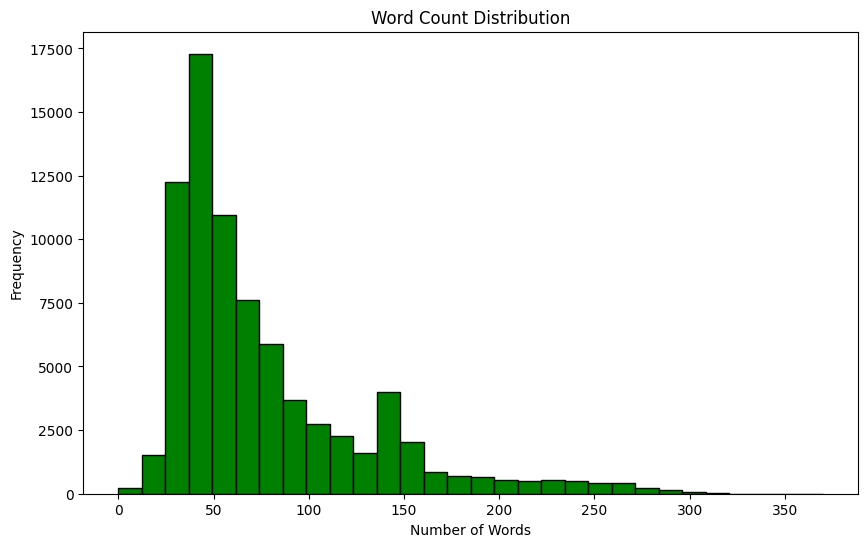

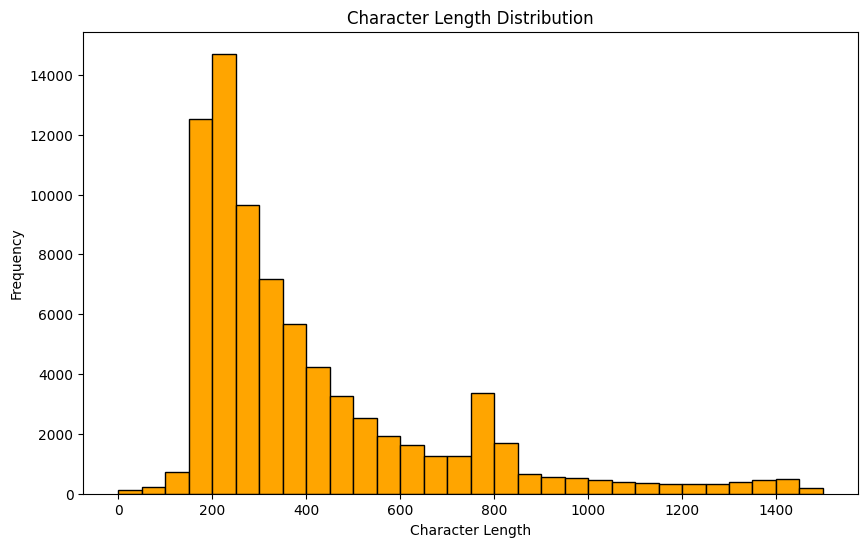

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('train.csv')
df_cleaned_eda = df_train_cleaned.copy()
# Assuming the relevant column is called 'text', replace with your column name
text_column = 'crimeaditionalinfo' 

# 1. White Space Count
df.dropna(subset=['crimeaditionalinfo'])
df['white_space_count'] = df[text_column].apply(lambda x: str(x).count(' '))
plt.figure(figsize=(10, 6))
plt.hist(df['white_space_count'], bins=30, color='skyblue', edgecolor='black')
plt.title('White Space Count Distribution')
plt.xlabel('Number of White Spaces')
plt.ylabel('Frequency')
plt.show()

# 2. Word Count Distribution
df_cleaned_eda['word_count'] = df_cleaned_eda[text_column].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned_eda['word_count'], bins=30, color='green', edgecolor='black')
plt.title('Word Count Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# 3. Character Length Distribution
df_cleaned_eda['char_length'] = df_cleaned_eda[text_column].apply(lambda x: len(str(x)))
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned_eda['char_length'], bins=30, color='orange', edgecolor='black')
plt.title('Character Length Distribution')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.show()


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
C:\Users\chauh\AppData\Local\Temp\ipykernel_9632\70165102.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_sentimental['BERT_Sentiment'], palette='coolwarm')


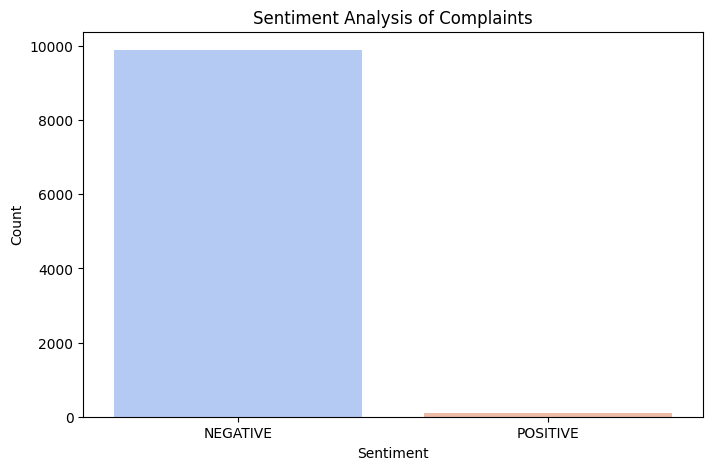

Improved Sentiment Analysis Completed.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
import concurrent.futures

# Load dataset
df_sentimental = df_train_cleaned.copy()

df_sentimental = df_sentimental[:10000]  # Limiting the dataset to 1000 for faster processing

# Initialize sentiment analysis pipeline (DistilBERT)
sentiment_pipeline = pipeline("sentiment-analysis")

# Apply sentiment analysis in batches using multi-threading
def batch_sentiment_analysis_batch(batch):
    return sentiment_pipeline(batch)

def parallel_sentiment_analysis(texts, batch_size=64):
    # Split texts into batches
    batches = [texts[i:i + batch_size] for i in range(0, len(texts), batch_size)]
    results = []
    
    # Use ThreadPoolExecutor for parallel processing
    with concurrent.futures.ThreadPoolExecutor() as executor:
        for result in executor.map(batch_sentiment_analysis_batch, batches):
            results.extend(result)
    
    return [result['label'] for result in results]

# Extract the 'crimeaditionalinfo' column for sentiment analysis
texts = df_sentimental['crimeaditionalinfo'].fillna("").tolist()

# Perform sentiment analysis in parallel
df_sentimental['BERT_Sentiment'] = parallel_sentiment_analysis(texts)

# Sentiment Distribution Plot
plt.figure(figsize=(8, 5))
sns.countplot(x=df_sentimental['BERT_Sentiment'], palette='coolwarm')
plt.title("Sentiment Analysis of Complaints")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

print("Improved Sentiment Analysis Completed.")


NAMED ENTITIES (Didnt work)

In [54]:
# from transformers import pipeline

# # Initialize the NER pipeline
# ner_pipeline = pipeline("ner", aggregation_strategy="simple")  # Aggregates multiple entities in the same span

# df_sentimental = df_sentimental[:100]

# # Apply NER on the 'crimeaditionalinfo' column
# def apply_ner(texts):
#     entities = []
#     for text in texts:
#         entities.append(ner_pipeline(text))
#     return entities

# # Extract the 'crimeaditionalinfo' column for NER
# texts = df_sentimental['crimeaditionalinfo'].fillna("").tolist()

# # Perform Named Entity Recognition
# df_sentimental['Named_Entities'] = apply_ner(texts)

# # Display the first few rows with extracted entities
# print(df_sentimental[['crimeaditionalinfo', 'Named_Entities']].head())



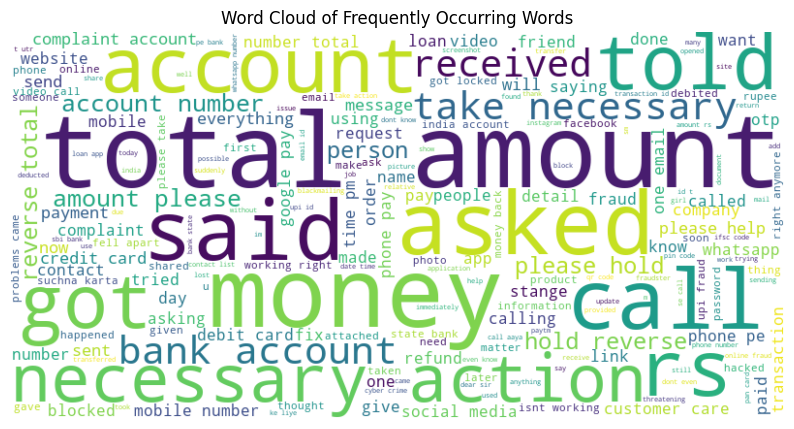

In [56]:
from wordcloud import WordCloud

# Concatenate all text data into a single string
text_data = " ".join(df_sentimental['crimeaditionalinfo'].dropna().astype(str).tolist())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Frequently Occurring Words")
plt.show()


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\chauh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
C:\Users\chauh\AppData\Local\Temp\ipykernel_9632\574324556.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='coolwarm')


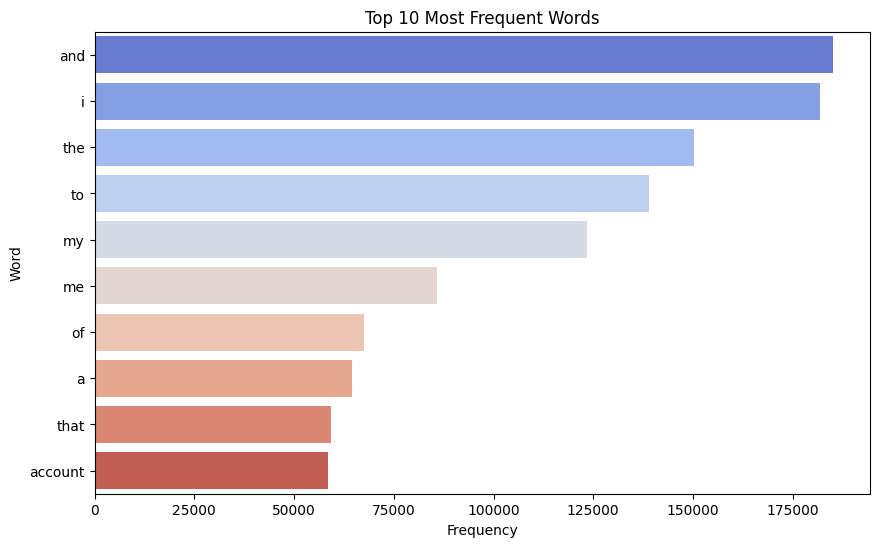

In [57]:
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
import string

# Download necessary NLTK data
nltk.download('punkt_tab')
df_sentimental = df_train_cleaned.copy()
# Tokenize the text and remove punctuation
text_data = " ".join(df_sentimental['crimeaditionalinfo'].dropna().astype(str).tolist())
tokens = word_tokenize(text_data)
tokens = [word.lower() for word in tokens if word.isalpha()]  # Remove punctuation and convert to lowercase

# Count word frequencies
word_counts = Counter(tokens)

# Get the most common words (top 10)
common_words = word_counts.most_common(10)

# Create a DataFrame for easy plotting
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='coolwarm')
plt.title("Top 10 Most Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()


C:\Users\chauh\AppData\Local\Temp\ipykernel_9632\1964989869.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=common_bigrams_df, palette='coolwarm')


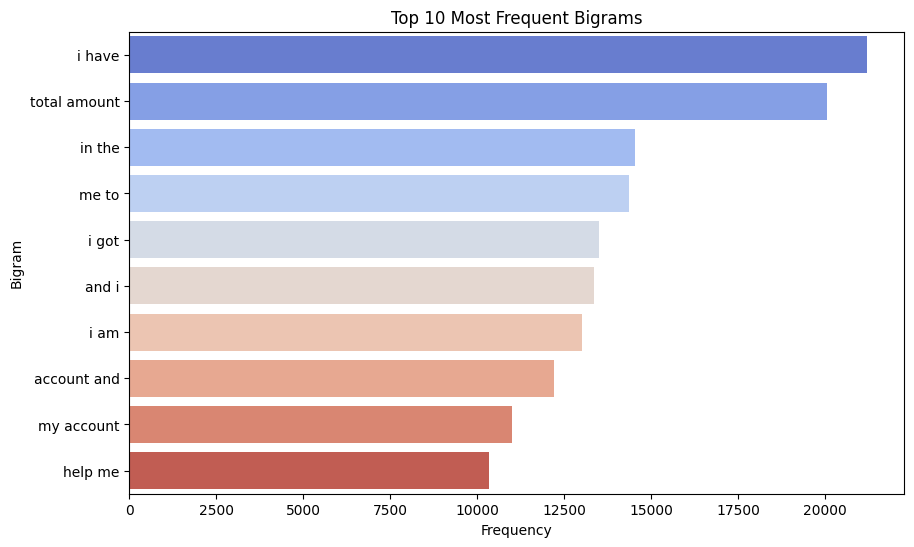

In [58]:
from nltk import ngrams
from collections import Counter

# Tokenize the text
tokens = word_tokenize(text_data)
tokens = [word.lower() for word in tokens if word.isalpha()]

# Create bigrams
bigrams = list(ngrams(tokens, 2))  # Change to 3 for trigrams

# Count bigram frequencies
bigram_counts = Counter(bigrams)

# Get the most common bigrams (top 10)
common_bigrams = bigram_counts.most_common(10)

# Prepare the bigram data for plotting
common_bigrams_df = pd.DataFrame(common_bigrams, columns=['Bigram', 'Frequency'])
common_bigrams_df['Bigram'] = common_bigrams_df['Bigram'].apply(lambda x: ' '.join(x))  # Combine the tuple into a string

# Plot the bigram frequency chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Bigram', data=common_bigrams_df, palette='coolwarm')
plt.title("Top 10 Most Frequent Bigrams")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()


C:\Users\chauh\AppData\Local\Temp\ipykernel_9632\1025742983.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Trigram', data=common_trigrams_df, palette='coolwarm')


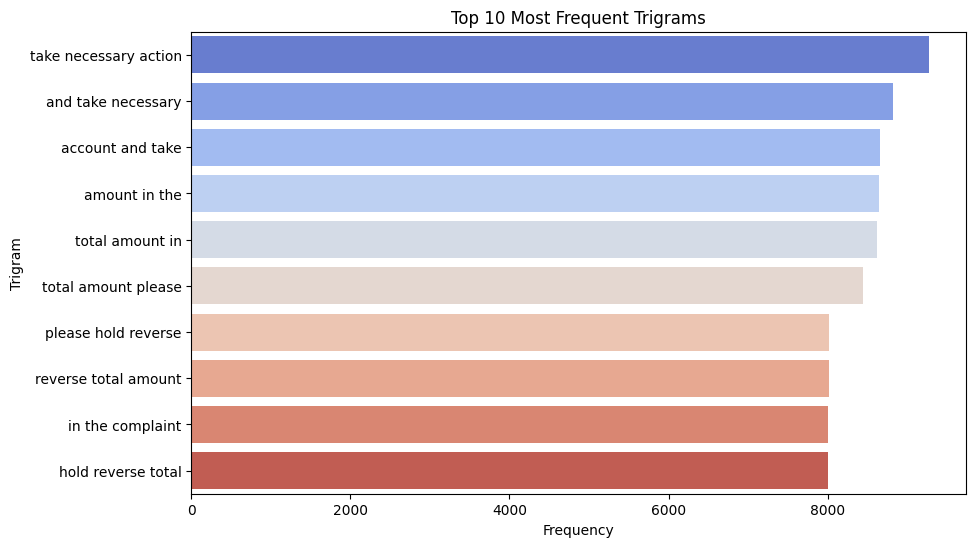

In [59]:
# Create trigrams
trigrams = list(ngrams(tokens, 3))  # Change to 3 for trigrams

# Count trigram frequencies
trigram_counts = Counter(trigrams)

# Get the most common trigrams (top 10)
common_trigrams = trigram_counts.most_common(10)

# Prepare the trigram data for plotting
common_trigrams_df = pd.DataFrame(common_trigrams, columns=['Trigram', 'Frequency'])
common_trigrams_df['Trigram'] = common_trigrams_df['Trigram'].apply(lambda x: ' '.join(x))  # Combine the tuple into a string

# Plot the trigram frequency chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Trigram', data=common_trigrams_df, palette='coolwarm')
plt.title("Top 10 Most Frequent Trigrams")
plt.xlabel("Frequency")
plt.ylabel("Trigram")
plt.show()
